In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read a CSV file into a DataFrame
combined_All_batch = pd.read_csv('../combined_and_clean_data/combined_All_batch_participants.csv')



Acceptance mean rate 28.1
Acceptance Standard Deviation rate 20.41

Aggregated Acceptance by Location:
              Location  Total Applicants  Total Accepted  Acceptance Rate (%)
0           Ayeyarwady                 2             0.0             0.000000
1                 Chin                 1             0.0             0.000000
2               Others                10             0.0             0.000000
3              Rakhine                 1             0.0             0.000000
4                 Bago                 6             1.0            16.666667
5           Taninthary                 4             1.0            25.000000
6    Thailand (Others)                 4             1.0            25.000000
7                Kayin                 7             2.0            28.571429
8             Mandalay                22             7.0            31.818182
9                 Shan                 8             3.0            37.500000
10              Kachin                 

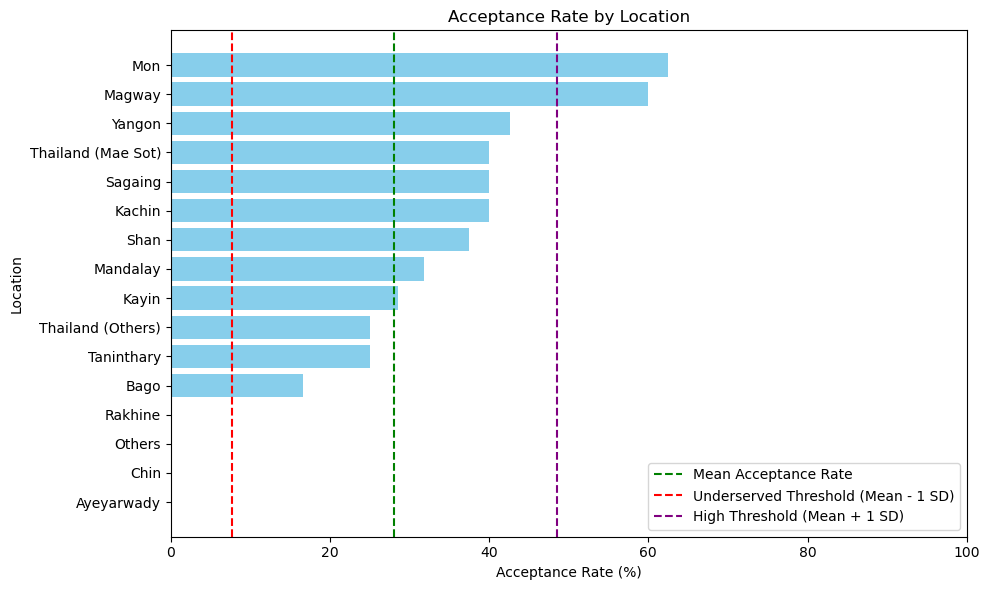

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# Load the DataFrames from pickled files
with open('acceptance_summary.pkl', 'rb') as f:
    acceptance_summary = pickle.load(f)

with open('acceptance_summary2.pkl', 'rb') as f:
    acceptance_summary2 = pickle.load(f)

# Combine DataFrames
combined_df = pd.concat([acceptance_summary, acceptance_summary2], ignore_index=True)

# Aggregate counts of students accepted by location
location_counts = combined_df.groupby('Location').agg({'Total Applicants': 'sum', 'Total Accepted': 'sum'}).reset_index()

# Calculate acceptance rate
location_counts['Acceptance Rate (%)'] = (location_counts['Total Accepted'] / location_counts['Total Applicants']) * 100

# Calculate mean and standard deviation of acceptance rates
mean_acceptance_rate = location_counts['Acceptance Rate (%)'].mean()
std_acceptance_rate = location_counts['Acceptance Rate (%)'].std()
print("Acceptance mean rate",round(mean_acceptance_rate,2))
print("Acceptance Standard Deviation rate",round(std_acceptance_rate,2))

# Determine thresholds
underserved_threshold = mean_acceptance_rate - std_acceptance_rate
high_threshold = mean_acceptance_rate + std_acceptance_rate

# Sort locations by acceptance rate in ascending order
location_counts = location_counts.sort_values(by='Acceptance Rate (%)').reset_index(drop=True)

# Display aggregated results with thresholds
print("\nAggregated Acceptance by Location:")
print(location_counts)
print("\nUnderserved Locations (Acceptance Rate below mean - 1 std dev):")
print(location_counts[location_counts['Acceptance Rate (%)'] < underserved_threshold])
print("\nHigh-Performing Locations (Acceptance Rate above mean + 1 std dev):")
print(location_counts[location_counts['Acceptance Rate (%)'] > high_threshold])

# Plot
plt.figure(figsize=(10, 6))
plt.barh(location_counts['Location'], location_counts['Acceptance Rate (%)'], color='skyblue')
plt.axvline(x=mean_acceptance_rate, color='green', linestyle='--', label='Mean Acceptance Rate')
plt.axvline(x=underserved_threshold, color='red', linestyle='--', label='Underserved Threshold (Mean - 1 SD)')
plt.axvline(x=high_threshold, color='purple', linestyle='--', label='High Threshold (Mean + 1 SD)')
plt.title('Acceptance Rate by Location')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Location')
plt.xlim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()
